<a href="https://colab.research.google.com/github/tabaahi07/Machine-Learning/blob/main/10.%20kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
import pandas as pd
df = pd.DataFrame(data.data)
df.rename(columns = {0:'sepal length' , 1:'sepal width' , 2:'petal length' , 3:'petal width'} , inplace = True)
df = df.drop(['sepal length' , 'sepal width'],axis=1)
df.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


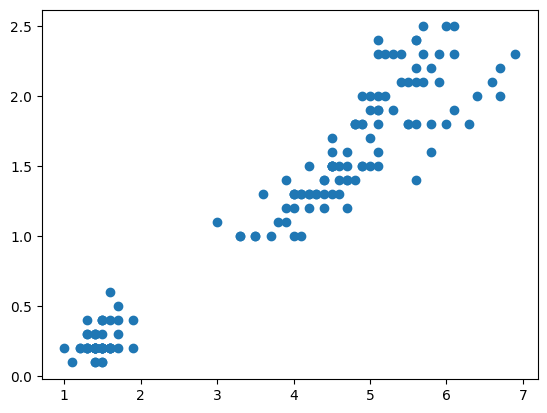

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df['petal length'] , df['petal width'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['petal length']])
df['petal length'] = scaler.transform(df[['petal length']])

scaler.fit(df[['petal width']])
df['petal width'] = scaler.transform(df[['petal width']])
df

,petal length,petal width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
y_pred = model.predict(df[['petal length' , 'petal width']])
df['cluster'] = y_pred
df

,petal length,petal width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [ ]:
model.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [ ]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df1.head()

,petal length,petal width,cluster
50,0.627119,0.541667,0
51,0.593220,0.583333,0
52,0.661017,0.583333,0
53,0.508475,0.500000,0
54,0.610169,0.583333,0


Text(0, 0.5, 'petal width')

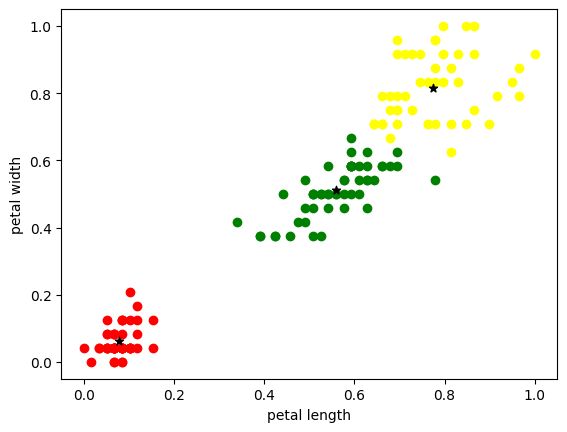

In [ ]:
plt.scatter(df1['petal length'] , df1['petal width'] , color='green' )
plt.scatter(df2['petal length'] , df2['petal width'] , color='red' )
plt.scatter(df3['petal length'] , df3['petal width'] , color='yellow')
plt.scatter(model.cluster_centers_[:,0] , model.cluster_centers_[:,1] , color = 'black' , marker='*' , label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [ ]:
inertia = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df)
  inertia.append(km.inertia_)
print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[128.2616865530605, 38.22615884825025, 1.701874688192097, 1.2555382834168465, 0.8535683225340073, 0.6801035704886194, 0.5656776810037091, 0.4858084553914369, 0.41548457851716364]


Text(0, 0.5, 'sum of squared error')

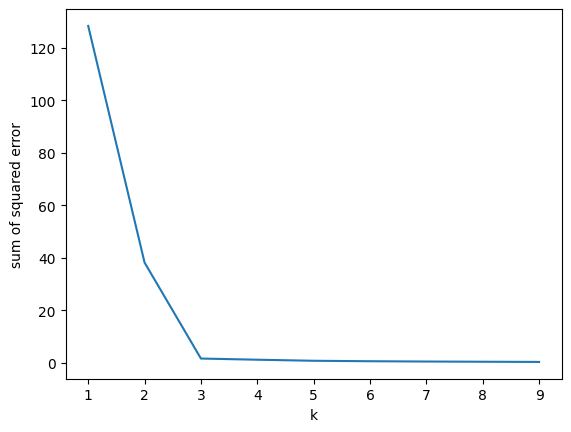

In [ ]:
plt.plot(range(1,10),inertia)
plt.xlabel('k')
plt.ylabel('sum of squared error')